In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2020= pd.read_excel('2020.xlsx')
df_2021= pd.read_excel('2021.xlsx')
df_2022= pd.read_excel('2022.xlsx')

In [3]:
df_2022.columns

Index(['Nombre', 'Código NIF', 'Localidad', 'Provincia', 'País',
       'Código primario CNAE 2009', 'Literal código CNAE 2009 primario',
       'Fecha constitución', 'Importador / Exportador', 'Países importación',
       'Países exportación', 'Otros activos líquidos\nmil EUR\n2022',
       'Inmovilizado\nmil EUR\n2022', 'Inmovilizado inmaterial\nmil EUR\n2022',
       'Inmovilizado material\nmil EUR\n2022',
       'Otros activos fijos\nmil EUR\n2022',
       'Activo circulante\nmil EUR\n2022', 'Existencias\nmil EUR\n2022',
       'Deudores\nmil EUR\n2022', 'Tesorería\nmil EUR\n2022',
       'Total activo\nmil EUR\n2022', 'Capital suscrito\nmil EUR\n2022',
       'Otros fondos propios\nmil EUR\n2022', 'Pasivo fijo\nmil EUR\n2022',
       'Acreedores a L. P.\nmil EUR\n2022',
       'Otros pasivos fijos\nmil EUR\n2022', 'Pasivo líquido\nmil EUR\n2022',
       'Deudas financieras\nmil EUR\n2022',
       'Acreedores comerciales\nmil EUR\n2022',
       'Otros pasivos líquidos\nmil EUR\n202

In [4]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39479 entries, 0 to 39478
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Nombre                                               39479 non-null  object 
 1   Código NIF                                           39479 non-null  object 
 2   Localidad                                            39478 non-null  object 
 3   Provincia                                            39479 non-null  object 
 4   País                                                 39479 non-null  object 
 5   Código primario CNAE 2009                            39479 non-null  int64  
 6   Literal código CNAE 2009 primario                    39479 non-null  object 
 7   Fecha constitución                                   39465 non-null  object 
 8   Importador / Exportador                              39479 non-nul

In [5]:
df_2020_ingexp = df_2020[['Código NIF','Ingresos de explotación\nmil EUR\n2020']]
df_2020_ingexp.replace('n.d.',np.nan,inplace=True)
df_2020_ingexp.replace('Financial Export limit reached',np.nan,inplace=True)
df_2020_ingexp.isna().sum()


/tmp/ipykernel_12800/2237610778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_ingexp.replace('n.d.',np.nan,inplace=True)
/tmp/ipykernel_12800/2237610778.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2020_ingexp.replace('Financial Export limit reached',np.nan,inplace=True)
/tmp/ipykernel_12800/2237610778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_ingexp

Código NIF                                    0
Ingresos de explotación\nmil EUR\n2020    10068
dtype: int64

In [6]:
df_2022_col=df_2022[['Nombre', 'Código NIF', 'Localidad',
       'Provincia', 'País', 'Código primario CNAE 2009',
       'Literal código CNAE 2009 primario', 'Fecha constitución',
       'Importador / Exportador', 'Países importación', 'Países exportación','Resultado del Ejercicio\nmil EUR\n2022',
       'Total activo\nmil EUR\n2022', 'Ingresos de explotación\nmil EUR\n2022', 'Activo circulante\nmil EUR\n2022', 
       'Pasivo líquido\nmil EUR\n2022', 'Resultado Explotación\nmil EUR\n2022',  
       'Otros activos líquidos\nmil EUR\n2022','Capital suscrito\nmil EUR\n2022',
       'Otros fondos propios\nmil EUR\n2022','Número empleados\n2022', 'Pasivo fijo\nmil EUR\n2022',
       'Acreedores a L. P.\nmil EUR\n2022',
       'Otros pasivos fijos\nmil EUR\n2022',
       'Deudas financieras\nmil EUR\n2022',
       'Acreedores comerciales\nmil EUR\n2022',
       'Otros pasivos líquidos\nmil EUR\n2022', 'Inmovilizado\nmil EUR\n2022', 'Otros activos fijos\nmil EUR\n2022']]
df_2022_col.head()

,Nombre,Código NIF,Localidad,Provincia,País,Código primario CNAE 2009,Literal código CNAE 2009 primario,Fecha constitución,Importador / Exportador,Países importación,...,Otros fondos propios\nmil EUR\n2022,Número empleados\n2022,Pasivo fijo\nmil EUR\n2022,Acreedores a L. P.\nmil EUR\n2022,Otros pasivos fijos\nmil EUR\n2022,Deudas financieras\nmil EUR\n2022,Acreedores comerciales\nmil EUR\n2022,Otros pasivos líquidos\nmil EUR\n2022,Inmovilizado\nmil EUR\n2022,Otros activos fijos\nmil EUR\n2022
0,IBERDROLA CLIENTES SOCIEDAD ANONIMA.,A95758389,BILBAO,Vizcaya,ESPANA,3514,Comercio de energía eléctrica,2014-03-17 00:00:00,Exportador,NaN,...,1344809.0,887.0,73692.0,15522.0,58170.0,53247.0,210709.0,1414596.0,483676.0,315025.0
1,PAN AMERICAN ENERGY SL.,B88260203,BILBAO,Vizcaya,ESPANA,6420,Actividades de las sociedades holding,1997-09-29 00:00:00,Exportador,NaN,...,5777889.0,4939.0,4850463.0,1669228.0,3181235.0,369521.0,643621.0,714128.0,12748223.0,1732003.0
2,IBERDROLA ENERGIA ESPAÑA SOCIEDAD ANONIMA.,A95758371,BILBAO,Vizcaya,ESPANA,4611,Intermediarios del comercio de materias primas...,2014-03-17 00:00:00,Exportador,NaN,...,-772285.0,243.0,3751684.0,3736825.0,14859.0,117.0,190448.0,2028725.0,3301347.0,3255329.0
3,ALVEAN SUGAR SOCIEDAD LIMITADA.,B95773057,BILBAO,Vizcaya,ESPANA,4636,"Comercio al por mayor de azúcar, chocolate y c...",2014-07-17 00:00:00,Importador / Exportador,NaN,...,312183.0,38.0,4498.0,3878.0,620.0,284983.0,90500.0,112227.0,36129.0,31093.0
4,"IBERDROLA, SOCIEDAD ANONIMA",A48010615,BILBAO,Vizcaya,ESPANA,6420,Actividades de las sociedades holding,1901-07-19 00:00:00,Exportador,NaN,...,26909000.0,853.0,11434000.0,10099000.0,1335000.0,1170000.0,NaN,9058000.0,50042000.0,49653000.0


Descartamos el df del 2021 al ver una gran cantidad de duplicados y al tener muchos menos datos no repetidos que el resto de los df.

In [7]:
nif_comunes =  set(df_2020['Código NIF'])&set(df_2022['Código NIF'])
len(nif_comunes)

39464

In [8]:
paises=list(df_2022_col[['Países exportación']].value_counts().index)
paises

[('UE',),
 ('EUROPA',),
 ('FRANCIA',),
 ('PORTUGAL',),
 ('UE;EEUU',),
 ('MEXICO',),
 ('AMERICA;ASIA;EUROPA',),
 ('CENTRO AMERICA;SUDAMERICA;UE',),
 ('FRANCIA;PORTUGAL',),
 ('ITALIA',),
 ('AMERICA;UE',),
 ('SUDAMERICA;UE',),
 ('ALEMANIA;FRANCIA',),
 ('CHINA',),
 ('ALEMANIA',),
 ('CUBA',),
 ('AFRICA;AMERICA;ASIA;EUROPA;OCEANIA',),
 ('AFRICA;AMERICA;ASIA;EUROPA',),
 ('EEUU',),
 ('BELGICA',),
 ('AMERICA;EUROPA',),
 ('AMERICA',),
 ('EUROPA;CENTRO AMERICA;SUDAMERICA',),
 ('ALEMANIA;FRANCIA;ITALIA;PORTUGAL',),
 ('EUROPA;EEUU',),
 ('SUECIA',),
 ('ALEMANIA;EEUU;UK',),
 ('CENTRO AMERICA;SUDAMERICA',),
 ('EUROPA;SUDAMERICA',),
 ('UE;AMERICA',),
 ('FRANCIA;UK;RUMANIA',),
 ('EUROPA;AUSTRALIA;CANADA;EEUU;JAPON;NUEVA ZELANDA',),
 ('INDIA',),
 ('INDIA;FRANCIA;CHINA',),
 ('EUROPA;ALEMANIA;SUECIA;FRANCIA;UK',),
 ('INDIA;PORTUGAL',),
 ('EUROPA;ORIENTE MEDIO;CHINA;EGIPTO',),
 ('IRLANDA;EEUU;AUSTRALIA;FRANCIA;CANADA',),
 ('ITALIA;FRANCIA',),
 ('ITALIA;FRANCIA;JAPON;ALEMANIA;AUSTRIA;EEUU;UK;ARABIA SAUDI',),

In [9]:
df_2022_col_comunes =  df_2022_col[df_2022_col['Código NIF'].isin(nif_comunes)]
df_2022_col_comunes.drop_duplicates(inplace=True)
df_2022_col_comunes.reset_index(inplace=True, drop=True)
df_2022_col_comunes.head()

/tmp/ipykernel_12800/981536150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_col_comunes.drop_duplicates(inplace=True)


,Nombre,Código NIF,Localidad,Provincia,País,Código primario CNAE 2009,Literal código CNAE 2009 primario,Fecha constitución,Importador / Exportador,Países importación,...,Otros fondos propios\nmil EUR\n2022,Número empleados\n2022,Pasivo fijo\nmil EUR\n2022,Acreedores a L. P.\nmil EUR\n2022,Otros pasivos fijos\nmil EUR\n2022,Deudas financieras\nmil EUR\n2022,Acreedores comerciales\nmil EUR\n2022,Otros pasivos líquidos\nmil EUR\n2022,Inmovilizado\nmil EUR\n2022,Otros activos fijos\nmil EUR\n2022
0,IBERDROLA CLIENTES SOCIEDAD ANONIMA.,A95758389,BILBAO,Vizcaya,ESPANA,3514,Comercio de energía eléctrica,2014-03-17 00:00:00,Exportador,NaN,...,1344809.0,887.0,73692.0,15522.0,58170.0,53247.0,210709.0,1414596.0,483676.0,315025.0
1,PAN AMERICAN ENERGY SL.,B88260203,BILBAO,Vizcaya,ESPANA,6420,Actividades de las sociedades holding,1997-09-29 00:00:00,Exportador,NaN,...,5777889.0,4939.0,4850463.0,1669228.0,3181235.0,369521.0,643621.0,714128.0,12748223.0,1732003.0
2,IBERDROLA ENERGIA ESPAÑA SOCIEDAD ANONIMA.,A95758371,BILBAO,Vizcaya,ESPANA,4611,Intermediarios del comercio de materias primas...,2014-03-17 00:00:00,Exportador,NaN,...,-772285.0,243.0,3751684.0,3736825.0,14859.0,117.0,190448.0,2028725.0,3301347.0,3255329.0
3,ALVEAN SUGAR SOCIEDAD LIMITADA.,B95773057,BILBAO,Vizcaya,ESPANA,4636,"Comercio al por mayor de azúcar, chocolate y c...",2014-07-17 00:00:00,Importador / Exportador,NaN,...,312183.0,38.0,4498.0,3878.0,620.0,284983.0,90500.0,112227.0,36129.0,31093.0
4,"IBERDROLA, SOCIEDAD ANONIMA",A48010615,BILBAO,Vizcaya,ESPANA,6420,Actividades de las sociedades holding,1901-07-19 00:00:00,Exportador,NaN,...,26909000.0,853.0,11434000.0,10099000.0,1335000.0,1170000.0,NaN,9058000.0,50042000.0,49653000.0


In [10]:
df_2020_comunes =  df_2020[df_2020['Código NIF'].isin(nif_comunes)]
df_2020_comunes.drop_duplicates(inplace=True)
df_2020_comunes.reset_index(inplace=True, drop=True)
df_2020_comunes.head()

/tmp/ipykernel_12800/3413841440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_comunes.drop_duplicates(inplace=True)


,Nombre,Código NIF,Localidad,Provincia,País,Código primario CNAE 2009,Literal código CNAE 2009 primario,Fecha constitución,Importador / Exportador,Países importación,...,Resultado Actividades Ordinarias\nmil EUR\n2020,Ingresos extraordinarios\nmil EUR\n2020,Gastos extraordinarios\nmil EUR\n2020,Resultados actividades extraordinarias\nmil EUR\n2020,Resultado del Ejercicio\nmil EUR\n2020,Materiales\nmil EUR\n2020,Gastos de personal\nmil EUR\n2020,Dotaciones para amortiz. de inmovil.\nmil EUR\n2020,Otros Conceptos de Explotación\nmil EUR\n2020,Gastos financieros y gastos asimilados\nmil EUR\n2020
0,PETROLEOS DEL NORTE SOCIEDAD ANONIMA,A48053243,MUSKIZ,Vizcaya,ESPANA,1920,Refino de petróleo,1968-01-01 00:00:00,Importador / Exportador,UE,...,-140086,NaN,NaN,NaN,-140086,3362167,93672,97175,-225893,2613
1,SIDENOR ACEROS ESPECIALES SLU,B01292903,BASAURI,Vizcaya,ESPANA,2410,"Fabricación de productos básicos de hierro, ac...",1999-11-18 00:00:00,Importador / Exportador,UE,...,-39853,NaN,NaN,NaN,-39853,244284,90310,22212,-136437,3684
2,BRIDGESTONE HISPANIA MANUFACTURING SOCIEDAD LI...,B95922688,BASAURI,Vizcaya,ESPANA,2211,Fabricación de neumáticos y cámaras de caucho;...,2018-05-31 00:00:00,Exportador,NaN,...,1792,NaN,NaN,NaN,1792,282346,153205,43388,-76136,548
3,COMPAÑIA NORTEÑA DE BEBIDAS GASEOSAS NORBEGA S...,B48023030,GALDAKAO,Vizcaya,ESPANA,1107,Fabricación de bebidas no alcohólicas; producc...,1955-07-06 00:00:00,Importador,UE,...,18209.709,NaN,NaN,NaN,18209.709,608261.681,19561.039,14293.748,-61482.757,NaN
4,BAHIA DE BIZKAIA ELECTRICIDAD SOCIEDAD LIMITADA,B48969877,ZIERBENA,Vizcaya,ESPANA,3519,Producción de energía eléctrica de otros tipos,1998-04-30 00:00:00,Importador,NaN,...,1146.572,NaN,NaN,NaN,1146.572,132891.325,3818.954,23742.362,-15559.192,64.766


In [11]:
df_2022_comunes =  df_2022[df_2022['Código NIF'].isin(nif_comunes)]
df_2022_comunes.reset_index(inplace=True, drop=True)
df_2022_comunes.drop_duplicates(inplace=True)
df_2022_comunes.reset_index(inplace=True, drop=True)
df_2022_comunes.head()

/tmp/ipykernel_12800/491666476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_comunes.drop_duplicates(inplace=True)


,Nombre,Código NIF,Localidad,Provincia,País,Código primario CNAE 2009,Literal código CNAE 2009 primario,Fecha constitución,Importador / Exportador,Países importación,...,Resultado Actividades Ordinarias\nmil EUR\n2022,Ingresos extraordinarios\nmil EUR\n2022,Gastos extraordinarios\nmil EUR\n2022,Resultados actividades extraordinarias\nmil EUR\n2022,Resultado del Ejercicio\nmil EUR\n2022,Materiales\nmil EUR\n2022,Gastos de personal\nmil EUR\n2022,Dotaciones para amortiz. de inmovil.\nmil EUR\n2022,Otros Conceptos de Explotación\nmil EUR\n2022,Gastos financieros y gastos asimilados\nmil EUR\n2022
0,IBERDROLA CLIENTES SOCIEDAD ANONIMA.,A95758389,BILBAO,Vizcaya,ESPANA,3514,Comercio de energía eléctrica,2014-03-17 00:00:00,Exportador,NaN,...,627609.0,NaN,NaN,NaN,627609.0,12868251.0,77500.0,9612.0,-741812.0,1502.0
1,PAN AMERICAN ENERGY SL.,B88260203,BILBAO,Vizcaya,ESPANA,6420,Actividades de las sociedades holding,1997-09-29 00:00:00,Exportador,NaN,...,477940.0,NaN,NaN,NaN,477940.0,1134150.0,489580.0,805893.0,-2104010.0,488731.0
2,IBERDROLA ENERGIA ESPAÑA SOCIEDAD ANONIMA.,A95758371,BILBAO,Vizcaya,ESPANA,4611,Intermediarios del comercio de materias primas...,2014-03-17 00:00:00,Exportador,NaN,...,923275.0,NaN,NaN,NaN,923275.0,4046923.0,26987.0,2654.0,635929.0,9620.0
3,ALVEAN SUGAR SOCIEDAD LIMITADA.,B95773057,BILBAO,Vizcaya,ESPANA,4636,"Comercio al por mayor de azúcar, chocolate y c...",2014-07-17 00:00:00,Importador / Exportador,NaN,...,67407.0,NaN,NaN,NaN,67407.0,3874052.0,20475.0,1945.0,-13387.0,12819.0
4,"IBERDROLA, SOCIEDAD ANONIMA",A48010615,BILBAO,Vizcaya,ESPANA,6420,Actividades de las sociedades holding,1901-07-19 00:00:00,Exportador,NaN,...,2840000.0,NaN,NaN,NaN,2840000.0,NaN,166000.0,72000.0,347000.0,322000.0


In [12]:
df_2022_col_comunes.columns

Index(['Nombre', 'Código NIF', 'Localidad', 'Provincia', 'País',
       'Código primario CNAE 2009', 'Literal código CNAE 2009 primario',
       'Fecha constitución', 'Importador / Exportador', 'Países importación',
       'Países exportación', 'Resultado del Ejercicio\nmil EUR\n2022',
       'Total activo\nmil EUR\n2022', 'Ingresos de explotación\nmil EUR\n2022',
       'Activo circulante\nmil EUR\n2022', 'Pasivo líquido\nmil EUR\n2022',
       'Resultado Explotación\nmil EUR\n2022',
       'Otros activos líquidos\nmil EUR\n2022',
       'Capital suscrito\nmil EUR\n2022',
       'Otros fondos propios\nmil EUR\n2022', 'Número empleados\n2022',
       'Pasivo fijo\nmil EUR\n2022', 'Acreedores a L. P.\nmil EUR\n2022',
       'Otros pasivos fijos\nmil EUR\n2022',
       'Deudas financieras\nmil EUR\n2022',
       'Acreedores comerciales\nmil EUR\n2022',
       'Otros pasivos líquidos\nmil EUR\n2022', 'Inmovilizado\nmil EUR\n2022',
       'Otros activos fijos\nmil EUR\n2022'],
      dtype=

In [13]:
df_2020_comunes.replace('n.d.',np.nan,inplace=True)
df_2022_comunes.replace('n.d.',np.nan,inplace=True)
df_2022_col_comunes.replace('n.d.',np.nan,inplace=True)

/tmp/ipykernel_12800/3976597485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_comunes.replace('n.d.',np.nan,inplace=True)
/tmp/ipykernel_12800/3976597485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_comunes.replace('n.d.',np.nan,inplace=True)
/tmp/ipykernel_12800/3976597485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_col_comunes.replace('n.d.',np.nan,inplace=True)


In [14]:
print(df_2022_col_comunes.isna().sum())

Nombre                                        0
Código NIF                                    0
Localidad                                     1
Provincia                                     0
País                                          0
Código primario CNAE 2009                     0
Literal código CNAE 2009 primario             0
Fecha constitución                           14
Importador / Exportador                       0
Países importación                        37019
Países exportación                        38496
Resultado del Ejercicio\nmil EUR\n2022    10253
Total activo\nmil EUR\n2022               10106
Ingresos de explotación\nmil EUR\n2022    11011
Activo circulante\nmil EUR\n2022          10121
Pasivo líquido\nmil EUR\n2022             10341
Resultado Explotación\nmil EUR\n2022      10217
Otros activos líquidos\nmil EUR\n2022     10509
Capital suscrito\nmil EUR\n2022           10107
Otros fondos propios\nmil EUR\n2022       10134
Número empleados\n2022                  

In [15]:
df_2022_col_comunes=df_2022_col_comunes[df_2022_col_comunes['Total activo\nmil EUR\n2022'].notna()]
df_2022_col_comunes.isna().sum()


Nombre                                        0
Código NIF                                    0
Localidad                                     0
Provincia                                     0
País                                          0
Código primario CNAE 2009                     0
Literal código CNAE 2009 primario             0
Fecha constitución                            5
Importador / Exportador                       0
Países importación                        27301
Países exportación                        28557
Resultado del Ejercicio\nmil EUR\n2022      147
Total activo\nmil EUR\n2022                   0
Ingresos de explotación\nmil EUR\n2022      905
Activo circulante\nmil EUR\n2022             15
Pasivo líquido\nmil EUR\n2022               235
Resultado Explotación\nmil EUR\n2022        111
Otros activos líquidos\nmil EUR\n2022       403
Capital suscrito\nmil EUR\n2022               1
Otros fondos propios\nmil EUR\n2022          28
Número empleados\n2022                  

In [16]:
df_2020_2022=df_2022_col_comunes.merge(df_2020_ingexp, on='Código NIF', how='left')

### PROCESAMIENTO

In [17]:
#Factorizar la columna fecha de constitución
df_2020_2022['Fecha constitución'] = pd.to_datetime(df_2020_2022['Fecha constitución'])
df_2020_2022['Empresa reciente'] = df_2020_2022['Fecha constitución'].apply(lambda x: False if x.year < 2019 else True)

In [18]:
#Factorizar columna
print(df_2020_2022['Provincia'].unique())
df_2020_2022['Provincia'] = pd.factorize(df_2020_2022['Provincia'])[0] + 1
df_2020_2022

['Vizcaya' 'Guipuzcoa' 'Alava']


,Nombre,Código NIF,Localidad,Provincia,País,Código primario CNAE 2009,Literal código CNAE 2009 primario,Fecha constitución,Importador / Exportador,Países importación,...,Pasivo fijo\nmil EUR\n2022,Acreedores a L. P.\nmil EUR\n2022,Otros pasivos fijos\nmil EUR\n2022,Deudas financieras\nmil EUR\n2022,Acreedores comerciales\nmil EUR\n2022,Otros pasivos líquidos\nmil EUR\n2022,Inmovilizado\nmil EUR\n2022,Otros activos fijos\nmil EUR\n2022,Ingresos de explotación\nmil EUR\n2020,Empresa reciente
0,IBERDROLA CLIENTES SOCIEDAD ANONIMA.,A95758389,BILBAO,1,ESPANA,3514,Comercio de energía eléctrica,2014-03-17,Exportador,NaN,...,7.369200e+04,1.552200e+04,5.817000e+04,5.324700e+04,210709.0000,1.414596e+06,4.836760e+05,3.150250e+05,7.385719e+06,False
1,PAN AMERICAN ENERGY SL.,B88260203,BILBAO,1,ESPANA,6420,Actividades de las sociedades holding,1997-09-29,Exportador,NaN,...,4.850463e+06,1.669228e+06,3.181235e+06,3.695210e+05,643621.0000,7.141280e+05,1.274822e+07,1.732003e+06,2.591452e+06,False
2,IBERDROLA ENERGIA ESPAÑA SOCIEDAD ANONIMA.,A95758371,BILBAO,1,ESPANA,4611,Intermediarios del comercio de materias primas...,2014-03-17,Exportador,NaN,...,3.751684e+06,3.736825e+06,1.485900e+04,1.170000e+02,190448.0000,2.028725e+06,3.301347e+06,3.255329e+06,5.720173e+06,False
3,ALVEAN SUGAR SOCIEDAD LIMITADA.,B95773057,BILBAO,1,ESPANA,4636,"Comercio al por mayor de azúcar, chocolate y c...",2014-07-17,Importador / Exportador,NaN,...,4.498000e+03,3.878000e+03,6.200000e+02,2.849830e+05,90500.0000,1.122270e+05,3.612900e+04,3.109300e+04,3.199090e+06,False
4,"IBERDROLA, SOCIEDAD ANONIMA",A48010615,BILBAO,1,ESPANA,6420,Actividades de las sociedades holding,1901-07-19,Exportador,NaN,...,1.143400e+07,1.009900e+07,1.335000e+06,1.170000e+06,NaN,9.058000e+06,5.004200e+07,4.965300e+07,2.880000e+06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29353,UZIRALO SA.,A01488865,VITORIA-GASTEIZ,3,ESPANA,7022,Otras actividades de consultoría de gestión em...,2011-07-21,Importador,UE,...,1.330172e+03,1.330172e+03,0.000000e+00,NaN,3.6595,NaN,1.332713e+03,1.332713e+03,7.000000e+01,False
29354,VAB GESTION EMPRESARIAL SL,B01378199,VITORIA-GASTEIZ,3,ESPANA,6612,Actividades de intermediación en operaciones c...,2004-12-16,No realiza actividad exterior,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,5.687112e+02,5.687112e+02,NaN,False
29355,VALGAÑON GESTION SL,B01474865,VITORIA-GASTEIZ,3,ESPANA,6499,"Otros servicios financieros, excepto seguros y...",2010-07-02,No realiza actividad exterior,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,3.134352e+02,6.000000e+01,NaN,False
29356,VENALTA NAVIERA SL.,B01572825,LAPUEBLA DE LABARCA,3,ESPANA,4110,Promoción inmobiliaria,2018-11-28,No realiza actividad exterior,NaN,...,1.332811e+01,NaN,1.332811e+01,1.146950e+02,NaN,2.762930e+00,9.603550e+01,9.603550e+01,4.434797e+02,False


In [19]:
#Indice
df_2020_2022.set_index("Código NIF", inplace=True)
df_2020_2022.index.name=None

In [20]:
df_2020_2022

,Nombre,Localidad,Provincia,País,Código primario CNAE 2009,Literal código CNAE 2009 primario,Fecha constitución,Importador / Exportador,Países importación,Países exportación,...,Pasivo fijo\nmil EUR\n2022,Acreedores a L. P.\nmil EUR\n2022,Otros pasivos fijos\nmil EUR\n2022,Deudas financieras\nmil EUR\n2022,Acreedores comerciales\nmil EUR\n2022,Otros pasivos líquidos\nmil EUR\n2022,Inmovilizado\nmil EUR\n2022,Otros activos fijos\nmil EUR\n2022,Ingresos de explotación\nmil EUR\n2020,Empresa reciente
A95758389,IBERDROLA CLIENTES SOCIEDAD ANONIMA.,BILBAO,1,ESPANA,3514,Comercio de energía eléctrica,2014-03-17,Exportador,NaN,UE,...,7.369200e+04,1.552200e+04,5.817000e+04,5.324700e+04,210709.0000,1.414596e+06,4.836760e+05,3.150250e+05,7.385719e+06,False
B88260203,PAN AMERICAN ENERGY SL.,BILBAO,1,ESPANA,6420,Actividades de las sociedades holding,1997-09-29,Exportador,NaN,ARGENTINA,...,4.850463e+06,1.669228e+06,3.181235e+06,3.695210e+05,643621.0000,7.141280e+05,1.274822e+07,1.732003e+06,2.591452e+06,False
A95758371,IBERDROLA ENERGIA ESPAÑA SOCIEDAD ANONIMA.,BILBAO,1,ESPANA,4611,Intermediarios del comercio de materias primas...,2014-03-17,Exportador,NaN,UE,...,3.751684e+06,3.736825e+06,1.485900e+04,1.170000e+02,190448.0000,2.028725e+06,3.301347e+06,3.255329e+06,5.720173e+06,False
B95773057,ALVEAN SUGAR SOCIEDAD LIMITADA.,BILBAO,1,ESPANA,4636,"Comercio al por mayor de azúcar, chocolate y c...",2014-07-17,Importador / Exportador,NaN,NaN,...,4.498000e+03,3.878000e+03,6.200000e+02,2.849830e+05,90500.0000,1.122270e+05,3.612900e+04,3.109300e+04,3.199090e+06,False
A48010615,"IBERDROLA, SOCIEDAD ANONIMA",BILBAO,1,ESPANA,6420,Actividades de las sociedades holding,1901-07-19,Exportador,NaN,UE,...,1.143400e+07,1.009900e+07,1.335000e+06,1.170000e+06,NaN,9.058000e+06,5.004200e+07,4.965300e+07,2.880000e+06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A01488865,UZIRALO SA.,VITORIA-GASTEIZ,3,ESPANA,7022,Otras actividades de consultoría de gestión em...,2011-07-21,Importador,UE,NaN,...,1.330172e+03,1.330172e+03,0.000000e+00,NaN,3.6595,NaN,1.332713e+03,1.332713e+03,7.000000e+01,False
B01378199,VAB GESTION EMPRESARIAL SL,VITORIA-GASTEIZ,3,ESPANA,6612,Actividades de intermediación en operaciones c...,2004-12-16,No realiza actividad exterior,NaN,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,5.687112e+02,5.687112e+02,NaN,False
B01474865,VALGAÑON GESTION SL,VITORIA-GASTEIZ,3,ESPANA,6499,"Otros servicios financieros, excepto seguros y...",2010-07-02,No realiza actividad exterior,NaN,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,3.134352e+02,6.000000e+01,NaN,False
B01572825,VENALTA NAVIERA SL.,LAPUEBLA DE LABARCA,3,ESPANA,4110,Promoción inmobiliaria,2018-11-28,No realiza actividad exterior,NaN,NaN,...,1.332811e+01,NaN,1.332811e+01,1.146950e+02,NaN,2.762930e+00,9.603550e+01,9.603550e+01,4.434797e+02,False


# Mapeo de Sectores

In [21]:
# Función para mapear sectores (1)

def mapeo_sectores(cnae):
    if cnae < 500:
        return "Agricultura"
    elif cnae < 1000:
        return "Extraccion"
    elif cnae < 3500:
        return "Industria"
    elif cnae < 3599:
        return "Energia"
    elif cnae < 4000:
        return "Agua"
    elif cnae < 4400:
        return "Construccion"
    elif cnae < 4800:
        return "Comercio"
    elif cnae < 5500:
        return "Transporte"
    elif cnae < 5800:
        return "Hosteleria"
    elif cnae < 6400:
        return "Comunicaciones"
    elif cnae < 6800:
        return "Financieras"
    elif cnae < 6900:
        return "Inmobiliarias"
    elif cnae < 7700:
        return "Actividades Profesionales"
    elif cnae < 8300:
        return "Actividades Administrativas"
    elif cnae < 8500:
        return "Administracion Publica y Defensa"
    elif cnae < 8600:
        return "Educacion"
    elif cnae < 9000:
        return "Actividades Sanitarias"
    elif cnae < 9400:
        return "Actividades Artisticas"
    else:
        return "Otros"
    

df_2020_2022["Mapeo Sectores"] = df_2020_2022["Código primario CNAE 2009"].apply(mapeo_sectores)

In [22]:
df_2020_2022["Mapeo Sectores"].value_counts()

Mapeo Sectores
Comercio                            6031
Industria                           4172
Construccion                        3790
Actividades Profesionales           3369
Inmobiliarias                       2792
Hosteleria                          1693
Transporte                          1221
Financieras                         1175
Actividades Administrativas         1148
Comunicaciones                       963
Actividades Sanitarias               857
Actividades Artisticas               574
Otros                                458
Educacion                            434
Agricultura                          291
Energia                              242
Agua                                  98
Extraccion                            37
Administracion Publica y Defensa      13
Name: count, dtype: int64

In [23]:
def mapeo_sectores(cnae):
    if cnae < 500:
        return "Otros" # Agricultura
    elif cnae < 1000:
        return "Otros" # Extraccion
    elif cnae < 3500:
        return "Industria"
    elif cnae < 3599:
        return "Otros" # Energia
    elif cnae < 4000:
        return "Otros" # Agua
    elif cnae < 4400:
        return "Construccion e Inmobilarias" # Construccion
    elif cnae < 4800:
        return "Comercio"
    elif cnae < 5500:
        return "Transporte"
    elif cnae < 5800:
        return "Hosteleria"
    elif cnae < 6400:
        return "Otros" # Comunicaciones
    elif cnae < 6800:
        return "Actividades Profesionales y Financieras" # Financieras
    elif cnae < 6900:
        return "Construccion e Inmobilarias" # Inmobiliarias
    elif cnae < 7700:
        return "Actividades Profesionales y Financieras" # Actividades Profesionales
    elif cnae < 8300:
        return "Otros" # Actividades Administrativas
    elif cnae < 8500:
        return "Otros" # Administracion Publica y Defensa
    elif cnae < 8600:
        return "Otros" # Educacion
    elif cnae < 9000:
        return "Otros" # Actividades Sanitarias
    elif cnae < 9400:
        return "Otros" # Actividades Artisticas
    else:
        return "Otros"
    
df_2020_2022["Mapeo Sectores"] = df_2020_2022["Código primario CNAE 2009"].apply(mapeo_sectores)
df_2020_2022["Mapeo Sectores"].value_counts()

Mapeo Sectores
Construccion e Inmobilarias                6582
Comercio                                   6031
Otros                                      5115
Actividades Profesionales y Financieras    4544
Industria                                  4172
Hosteleria                                 1693
Transporte                                 1221
Name: count, dtype: int64

In [24]:
factorizacion_sectores = df_2020_2022["Mapeo Sectores"].factorize()
df_2020_2022["Sectores Factorizado"] = factorizacion_sectores[0] # Se podría hacer +1 (Para que no empiece de 0)

In [25]:
df_2020_2022.drop(columns=["Código primario CNAE 2009","Literal código CNAE 2009 primario","Mapeo Sectores"],inplace=True)

# Comercio en Euros o no

In [26]:
df_2020_2022["Importador / Exportador"].value_counts()

Importador / Exportador
No realiza actividad exterior    24988
Importador / Exportador           1950
Importador                        1731
Exportador                         689
Name: count, dtype: int64

In [27]:
list(set(list(set((";".join(list(df_2020_2022["Países exportación"].value_counts().index))).split(";")))+ list(set((";".join(list(df_2020_2022["Países importación"].value_counts().index))).split(";")))))

['IRLANDA',
 'ITALIA',
 'AUSTRIA',
 'PORTUGAL',
 'TAILANDIA',
 'MOZAMBIQUE',
 'TURQUIA',
 'INDONESIA',
 'HUNGRIA',
 'SEYCHELLES',
 'NIGERIA',
 'REPUBLICA CHECA',
 'ESLOVENIA',
 'SERBIA',
 'VENEZUELA',
 'ARGELIA',
 'OCEANIA',
 'MARRUECOS',
 'ASIA',
 'JAMAICA',
 'NUEVA ZELANDA',
 'PANAMA',
 'COLOMBIA',
 'CENTRO AMERICA',
 'RUSIA',
 'SINGAPUR',
 'NORTE AMERICA',
 'SENEGAL',
 'VIETNAM',
 'LUXEMBURGO',
 'RUMANIA',
 'ANDORRA',
 'BRASIL',
 'MAURITANIA',
 'UE',
 'LITUANIA',
 'ALEMANIA',
 'MONTENEGRO',
 'AFRICA DEL NORTE',
 'ESCANDINAVIA',
 'ARGENTINA',
 'EUROPA',
 'COSTA RICA',
 'SUIZA',
 'CAMERUN',
 'FINLANDIA',
 'CHILE',
 'ARABIA SAUDI',
 'MEXICO',
 'DINAMARCA',
 'CUBA',
 'FRANCIA',
 'TAIWAN',
 'MALASIA',
 'PAISES ARABES',
 'INDIA',
 'URUGUAY',
 'AUSTRALIA',
 'BULGARIA',
 'EGIPTO',
 'ORIENTE MEDIO',
 'HONG KONG',
 'AMERICA',
 'GROENLANDIA',
 'GRECIA',
 'COSTA DE MARFIL',
 'SUDAMERICA',
 'SUECIA',
 'ECUADOR',
 'EEUU',
 'NORUEGA',
 'CANADA',
 'ANGOLA',
 'COREA DEL SUR',
 'ISRAEL',
 'GHANA',
 '

In [28]:
no_euro = ["ESLOVAQUIA",
 'ARGENTINA',
 'FILIPINAS',
 'COSTA DE MARFIL',
 'AUSTRALIA',
 'ISRAEL',
 'URUGUAY',
 'CHINA',
 'SUECIA',
 'ORIENTE MEDIO',
 'SUDAMERICA',
 'CANADA',
 'MAURITANIA',
 'NORTE AMERICA',
 'CUBA',
 'DINAMARCA',
 'ARGELIA',
 'NIGERIA',
 'GHANA',
 'VENEZUELA',
 'SUI',
 'ECUADOR',
 'SINGAPUR',
 'NUEVA ZELANDA',
 'GROENLANDIA',
 'ARABIA SAUDI',
 'POLONIA',
 'SUIZA',
 'PAISES ARABES',
 'PAKISTAN',
 'HUNGRIA',
 'BAHREIN',
 'VIETNAM',
 'AFRICA DEL NORTE',
 'MOZAMBIQUE',
 'QATAR',
 'COREA DEL SUR',
 'TAILANDIA',
 'PERU',
 'MALI',
 'MEXICO',
 'PANAMA',
 'MALASIA',
 'UK',
 'RUMANIA',
 'OCEANIA',
 'EMIRATOS ARABES UNIDOS',
 'ASIA',
 'REPUBLICA CHECA',
 'AFRICA',
 'LIBIA',
 'BULGARIA',
 'AMERICA',
 'CHILE',
 'CAMERUN',
 'SERBIA',
 'IRAN',
 'TUNEZ',
 'COSTA RICA',
 'KAZAJSTAN',
 'BRASIL',
 'REPUBLICA DOMINICANA',
 'HONG KONG',
 'SENEGAL',
 'INDONESIA',
 'ANGOLA',
 'CENTRO AMERICA',
 'EGIPTO',
 'MARRUECOS',
 'EEUU',
 'RUSIA',
 'JAPON',
 'COLOMBIA',
 'TURQUIA',
 'UCRANIA',
 'SEYCHELLES',
 'INDIA',
 'SUDAFRICA']

In [29]:
def pais(lista_paises):
    if type(lista_paises)==float:
        return np.nan
    lista_paises_sp = lista_paises.split(";")
    for pais in no_euro:
        if pais in lista_paises_sp:
            return True
    else:
        return False

exp = df_2020_2022["Países exportación"].apply(pais)
imp = df_2020_2022["Países importación"].apply(pais)

In [30]:
moneda = []
for i in range(len(exp)):
    if (exp[i] == True) or (imp[i]==True):
        moneda.append(True)
    else:
        moneda.append(False)

/tmp/ipykernel_12800/1566926137.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (exp[i] == True) or (imp[i]==True):


In [31]:
df_2020_2022["Moneda no euro"] = moneda

In [32]:
df_2020_2022["Moneda no euro"].isna().sum() - df_2020_2022["Importador / Exportador"].value_counts()[0]

/tmp/ipykernel_12800/655583348.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_2020_2022["Moneda no euro"].isna().sum() - df_2020_2022["Importador / Exportador"].value_counts()[0]


-24988

In [33]:
df_2020_2022[["Países importación","Países exportación","Moneda no euro"]].head(20)

,Países importación,Países exportación,Moneda no euro
A95758389,NaN,UE,False
B88260203,NaN,ARGENTINA,True
A95758371,NaN,UE,False
B95773057,NaN,NaN,False
A48010615,NaN,UE,False
A95554630,NaN,NaN,False
A95075578,NaN,NaN,False
B95924239,NaN,UE,False
A86583747,NaN,NaN,False
B95729463,UE,NaN,False


### RATIOS

In [34]:
df_2020_2022['Otros fondos propios\nmil EUR\n2022'] = df_2020_2022['Otros fondos propios\nmil EUR\n2022'].fillna(0)
df_2020_2022['Pasivo Total']=df_2020_2022['Total activo\nmil EUR\n2022']-df_2020_2022['Capital suscrito\nmil EUR\n2022']-df_2020_2022['Otros fondos propios\nmil EUR\n2022']
columnas_sumar=['Pasivo fijo\nmil EUR\n2022','Pasivo líquido\nmil EUR\n2022']
df_2020_2022['Pasivo Total'] = df_2020_2022['Pasivo Total'].fillna(df_2020_2022[columnas_sumar].sum(axis=1))
df_2020_2022['Endeudamiento']=df_2020_2022['Pasivo Total']/df_2020_2022['Total activo\nmil EUR\n2022']


In [35]:
columnas_sumar2=['Inmovilizado\nmil EUR\n2022', 'Otros activos fijos\nmil EUR\n2022']
df_2020_2022['Activo circulante\nmil EUR\n2022']=df_2020_2022['Activo circulante\nmil EUR\n2022'].fillna(df_2020_2022['Total activo\nmil EUR\n2022'] - df_2020_2022[columnas_sumar2].sum(axis=1))
df_2020_2022['Pasivo fijo\nmil EUR\n2022']=df_2020_2022['Pasivo fijo\nmil EUR\n2022'].fillna(0)
df_2020_2022['Pasivo líquido\nmil EUR\n2022'] = df_2020_2022['Pasivo líquido\nmil EUR\n2022'].fillna(df_2020_2022['Pasivo Total'] - df_2020_2022['Pasivo fijo\nmil EUR\n2022'])
df_2020_2022['Solvencia']=df_2020_2022['Activo circulante\nmil EUR\n2022']/df_2020_2022['Pasivo líquido\nmil EUR\n2022']

In [36]:
df_2020_2022['Evolucion_ventas_total']=df_2020_2022['Ingresos de explotación\nmil EUR\n2022']-df_2020_2022['Ingresos de explotación\nmil EUR\n2020']
df_2020_2022['Evolucion_ventas']=df_2020_2022['Evolucion_ventas_total']/df_2020_2022['Ingresos de explotación\nmil EUR\n2020']
df_2020_2022['Evolucion_ventas'] = df_2020_2022['Evolucion_ventas'].fillna(0)

In [37]:
df_2020_2022['Resultado del Ejercicio\nmil EUR\n2022'] = df_2020_2022['Resultado del Ejercicio\nmil EUR\n2022'].fillna(0)
df_2020_2022['ROA']=df_2020_2022['Resultado del Ejercicio\nmil EUR\n2022']/df_2020_2022['Total activo\nmil EUR\n2022']

In [43]:
df_procesado=df_2020_2022[['Provincia', 'Total activo\nmil EUR\n2022',
       'Empresa reciente', 'Sectores Factorizado', 'Moneda no euro',
       'Endeudamiento', 'Solvencia', 'Evolucion_ventas', 'ROA']]

In [44]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29358 entries, A95758389 to B86089067
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provincia                  29358 non-null  int64  
 1   Total activo
mil EUR
2022  29358 non-null  float64
 2   Empresa reciente           29358 non-null  bool   
 3   Sectores Factorizado       29358 non-null  int64  
 4   Moneda no euro             29358 non-null  bool   
 5   Endeudamiento              29358 non-null  float64
 6   Solvencia                  29358 non-null  float64
 7   Evolucion_ventas           29358 non-null  float64
 8   ROA                        29358 non-null  float64
dtypes: bool(2), float64(5), int64(2)
memory usage: 1.8+ MB


In [45]:
df_procesado.to_excel('df_procesado.xlsx', index=False)

In [46]:
corr_pearson = df_procesado.corr(method="pearson")
corr_spearman = df_procesado.corr(method="spearman")

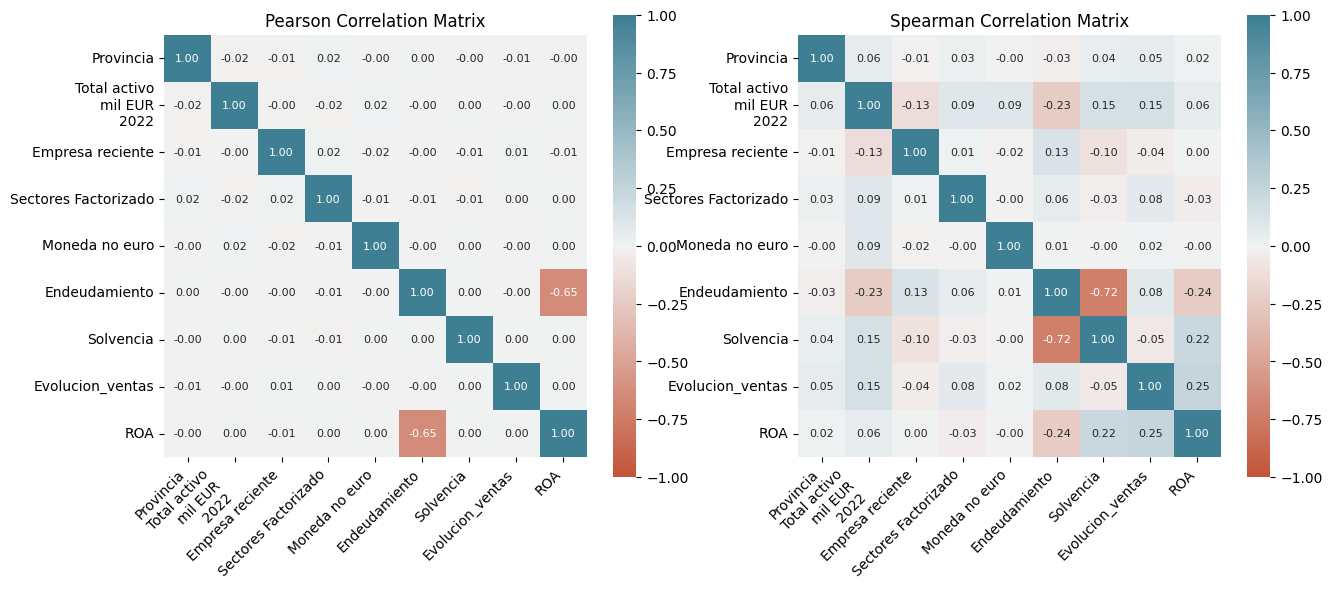

In [47]:
fig, ax =plt.subplots(1,2, figsize=(15,6))

sns.heatmap(corr_pearson, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax[0], annot=True, fmt=".2f", annot_kws={"size": 8})
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[0].set_yticklabels(ax[0].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[0].set_title("Pearson Correlation Matrix")

sns.heatmap(corr_spearman, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True, ax=ax[1], fmt=".2f", annot_kws={"size": 8})
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[1].set_yticklabels(ax[1].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[1].set_title("Spearman Correlation Matrix");

- ver cuales son las variables que nos interesan y cuales no para eliminarlas, correlacion haciendo dropna?
- ver las filas que tienen casi todo na por si eliminamos las filas y nos quedamos con las variables
- interpolacion en alguna de las columnas?
- pensar que nuevas varibales nos pueden valer.
-pensar los modelos que vamos a utilizar para el clustering, k-means, clustering jerarquico...
- organizar los 4 puntos del trabajo(4 archivos diferentes para cada paso):
1. Iniciar el proyecto requiere primero comprender el significado de las
variables presentes en las bases de datos y realizar una depuración de
estos datos para que sean aptos para trabajar con ellos.

2. Seguidamente, se procederá al cálculo de los ratios financieros.

3. Luego, basándose en los cálculos anteriores, se segmentarán las
empresas mediante el uso de algoritmos de clustering.

4. Tras segmentar las empresas en diferentes grupos, estos se deberán
analizar individualmente para poder seleccionar los productos financieros
que mejor se adecuan a cada tipo de empresa. Se realizará una
investigación y análisis detallado de una amplia gama de productos
financieros disponibles en el mercado. Esto incluirá, pero no se limitará a,
préstamos, líneas de crédito, opciones de inversión, y seguros
empresariales. Esta investigación deberá utilizar como punto de partida al
cliente principal, Inetum, y valorar sus posibilidades a la hora de elegir los
productos financieros.


ESTA ES LA DISTRIBUCIÓN QUE SE PROPONE:
1. Procesamiento
2. Análisis exploratorio
3. Selección del modelo
4. Optimización del modelo
5. Resultados (visualización)

- Cada cosa en un cuaderno diferente
- De cada cuaderno sale un nuevo fichero de datos
- El nuevo fichero de datos se utilizará en el siguiente cuaderno
- Es un proceso secuencial